In [2]:
# import the pandas library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load in the data to the DataFrames
uk_covid_cases = pd.read_csv('covid_19_uk_cases.csv')
uk_vaccinated = pd.read_csv('covid_19_uk_vaccinated.csv')
tweets = pd.read_csv('tweets.csv')

# validate the DataFrames head and shape
print(uk_covid_cases.head())
print(uk_covid_cases.shape)

print(uk_vaccinated.head())
print(uk_vaccinated.shape)

print(tweets.head())
print(tweets.shape)

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        

In [3]:
# determine the data types for each DataFrame

print(uk_covid_cases.dtypes)
print(uk_vaccinated.dtypes)
print(tweets.dtypes)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object
created_at                    object
id                           float64
id_str                       float64
text                          obj

In [4]:
# identify any records which have a NaN value
uk_covid_cases.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

In [5]:
# identify any records which have a NaN value
uk_vaccinated.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

In [6]:
# identify any records which have a NaN value
tweets.isnull().sum()

created_at                      1
id                              1
id_str                          1
text                            1
truncated                       1
source                          1
in_reply_to_status_id        3960
in_reply_to_status_id_str    3960
in_reply_to_user_id          3960
in_reply_to_user_id_str      3960
in_reply_to_screen_name      3960
contributors                 3960
is_quote_status                 1
retweet_count                   0
favorite_count                  0
favorited                       1
retweeted                       1
lang                            1
possibly_sensitive            830
quoted_status_id             3960
quoted_status_id_str         3960
dtype: int64

In [135]:
# filter cases for Gibraltar into a new variable
gibraltar_cases = uk_covid_cases[uk_covid_cases['Province/State'] == 'Gibraltar']

gibraltar_cases.head()
gibraltar_cases.shape

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


(632, 12)

In [134]:
# view the full set of records for the Gibraltar region
pd.set_option("display.max_rows", None)

gibraltar_cases.head()
gibraltar_cases.shape

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


(632, 12)

In [133]:
# create a Gibraltar subset
gibraltar_subset = gibraltar_cases[['Deaths', 'Cases', 'Recovered', 'Hospitalised']]
                                   
gibraltar_subset.head()
gibraltar_subset.shape

,Deaths,Cases,Recovered,Hospitalised
3792,0.0,0.0,0.0,0.0
3793,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0


(632, 4)

In [10]:
# describe the data for statistics
gibraltar_subset.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [132]:
# review the Gibraltar vaccination data by creating a new DataFrame
gibraltar_vaccinations = uk_vaccinated[uk_vaccinated['Province/State'] == 'Gibraltar']

gibraltar_vaccinations.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0


In [12]:
# describe the Gibraltar vaccination data
gibraltar_vaccinations.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,6.320000e+02,6.320000e+02,632.0,632.000000,632.000000,632.000000
mean,3.614080e+01,-5.353600e+00,0.0,8870.318038,9289.218354,8870.318038
std,4.266633e-14,5.333292e-14,0.0,15439.487761,16287.230372,15439.487761
min,3.614080e+01,-5.353600e+00,0.0,0.000000,0.000000,0.000000
25%,3.614080e+01,-5.353600e+00,0.0,0.000000,0.000000,0.000000
50%,3.614080e+01,-5.353600e+00,0.0,0.000000,0.000000,0.000000
75%,3.614080e+01,-5.353600e+00,0.0,14594.000000,12488.750000,14594.000000
max,3.614080e+01,-5.353600e+00,0.0,69619.000000,94038.000000,69619.000000


In [105]:
# merge the covid cases and vaccination DataFrames together 
covid_results = uk_covid_cases.merge(uk_vaccinated, on=['Province/State','Date'], how='left')

# print the merged DataFrame results and validate the data types
print(covid_results.head())
print(covid_results.shape)
print(covid_results.dtypes)

  Province/State Country/Region_x    Lat_x   Long_x  \
0       Anguilla   United Kingdom  18.2206 -63.0686   
1       Anguilla   United Kingdom  18.2206 -63.0686   
2       Anguilla   United Kingdom  18.2206 -63.0686   
3       Anguilla   United Kingdom  18.2206 -63.0686   
4       Anguilla   United Kingdom  18.2206 -63.0686   

  ISO 3166-1 Alpha 3-Codes_x                Sub-region Name_x  \
0                        AIA  Latin America and the Caribbean   
1                        AIA  Latin America and the Caribbean   
2                        AIA  Latin America and the Caribbean   
3                        AIA  Latin America and the Caribbean   
4                        AIA  Latin America and the Caribbean   

   Intermediate Region Code_x        Date  Deaths  Cases  ...  Hospitalised  \
0                          29  2020-01-22     0.0    0.0  ...           0.0   
1                          29  2020-01-23     0.0    0.0  ...           0.0   
2                          29  2020-01-24

In [106]:
# change the datatype of the Date column to DateTime
covid_results['Date'] = pd.to_datetime(covid_results['Date'])

# re-review the datatypes of the merged DataFrame
covid_results.dtypes

# validate the table results
covid_results.head()

Province/State                        object
Country/Region_x                      object
Lat_x                                float64
Long_x                               float64
ISO 3166-1 Alpha 3-Codes_x            object
Sub-region Name_x                     object
Intermediate Region Code_x             int64
Date                          datetime64[ns]
Deaths                               float64
Cases                                float64
Recovered                            float64
Hospitalised                         float64
Country/Region_y                      object
Lat_y                                float64
Long_y                               float64
ISO 3166-1 Alpha 3-Codes_y            object
Sub-region Name_y                     object
Intermediate Region Code_y             int64
Vaccinated                             int64
First Dose                             int64
Second Dose                            int64
dtype: object

,Province/State,Country/Region_x,Lat_x,Long_x,ISO 3166-1 Alpha 3-Codes_x,Sub-region Name_x,Intermediate Region Code_x,Date,Deaths,Cases,...,Hospitalised,Country/Region_y,Lat_y,Long_y,ISO 3166-1 Alpha 3-Codes_y,Sub-region Name_y,Intermediate Region Code_y,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0


In [107]:
# drop the duplicate y columns
covid_results = covid_results\
.drop(columns=['Country/Region_y',
               'Lat_y',
               'Long_y',
               'ISO 3166-1 Alpha 3-Codes_y',
               'Sub-region Name_y', 
               'Intermediate Region Code_y'])

# review the table with dropped columns
covid_results.head()

,Province/State,Country/Region_x,Lat_x,Long_x,ISO 3166-1 Alpha 3-Codes_x,Sub-region Name_x,Intermediate Region Code_x,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0,0,0


In [108]:
# rename the x column headers
covid_results = covid_results\
.rename(columns={'Country/Region_x':'Country/Region',
                 'Lat_x':'Lat',
                 'Long_x':'Long',
                 'ISO 3166-1 Alpha 3-Codes_x':'ISO 3166-1 Alpha 3-Codes', 
                 'Sub-region Name_x':'Sub-region Name',
                 'Intermediate Region Code_x':'Intermediate Region Code'})

covid_results.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0,0,0


In [109]:
# group the data by Province/State and Date and sum the First and Second doses
time_difference = covid_results.groupby(['Province/State','Date'])[['First Dose','Second Dose']].sum()
#create a new column to calculate the difference between the first and second doses
time_difference['Difference'] = time_difference['First Dose'] - time_difference['Second Dose']

#choose to print the tail to validate calculation has worked (.head() shows zeros)
time_difference.tail(20)

First Dose  Second Dose  Difference
Province/State           Date                                           
Turks and Caicos Islands 2021-09-25        1579         3063       -1484
                         2021-09-26        1039         1660        -621
                         2021-09-27        1620         2157        -537
                         2021-09-28        2070         2180        -110
                         2021-09-29        2050         2216        -166
                         2021-09-30        2234         2240          -6
                         2021-10-01        2482         2229         253
                         2021-10-02        2019         2235        -216
                         2021-10-03        1568         1400         168
                         2021-10-04        2449         1907         542
                         2021-10-05        2688         1857         831
                         2021-10-06        2134         1857         277
                         2021-10-07        2147         1863         284
                         2021-10-08        2060         1889         171
                         2021-10-09        2041         2176        -135
                         2021-10-10        1437         1264         173
                         2021-10-11        1896         1536         360
                         2021-10-12        2395         1751         644
                         2021-10-13           0            0           0
                         2021-10-14           0            0           0

In [110]:
country_trend = pd.DataFrame() 

country_trend['First Dose'] = covid_results.groupby('Province/State')['First Dose'].agg('sum') 

country_trend['Second Dose'] = covid_results.groupby('Province/State')['Second Dose'].agg('sum') 

country_trend['Difference'] = country_trend['First Dose'] - country_trend['Second Dose'] 

country_trend['Ratio of Interest'] = 100-(country_trend['Difference']/country_trend['First Dose']*100) 

country_trend

,First Dose,Second Dose,Difference,Ratio of Interest
Province/State,,,,
Anguilla,4931470,4709072,222398,95.490229
Bermuda,2817981,2690908,127073,95.490637
British Virgin Islands,5166303,4933315,232988,95.490237
Cayman Islands,3522476,3363624,158852,95.490331
Channel Islands,3287646,3139385,148261,95.490360
Falkland Islands (Malvinas),3757307,3587869,169438,95.490440
Gibraltar,5870786,5606041,264745,95.490468
Isle of Man,4226984,4036345,190639,95.489952
Montserrat,5401128,5157560,243568,95.490423


In [111]:
# import the required libraries for visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# add the Difference column to the covid_results DataFrame
covid_results['Difference'] = covid_results['First Dose'] - covid_results['Second Dose']

# validate the updated DataFrame
print(covid_results[['Province/State', 'Deaths']].head())


  Province/State  Deaths
0       Anguilla     0.0
1       Anguilla     0.0
2       Anguilla     0.0
3       Anguilla     0.0
4       Anguilla     0.0


[Text(0, 0, 'Anguilla'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'British Virgin Islands'),
 Text(3, 0, 'Cayman Islands'),
 Text(4, 0, 'Channel Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Gibraltar'),
 Text(7, 0, 'Isle of Man'),
 Text(8, 0, 'Montserrat'),
 Text(9, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(10, 0, 'Turks and Caicos Islands'),
 Text(11, 0, 'Others')]

Text(0.5, 1.0, 'First Dose vs Second Dose by Region')

Text(0, 0.5, 'Total Vaccination')

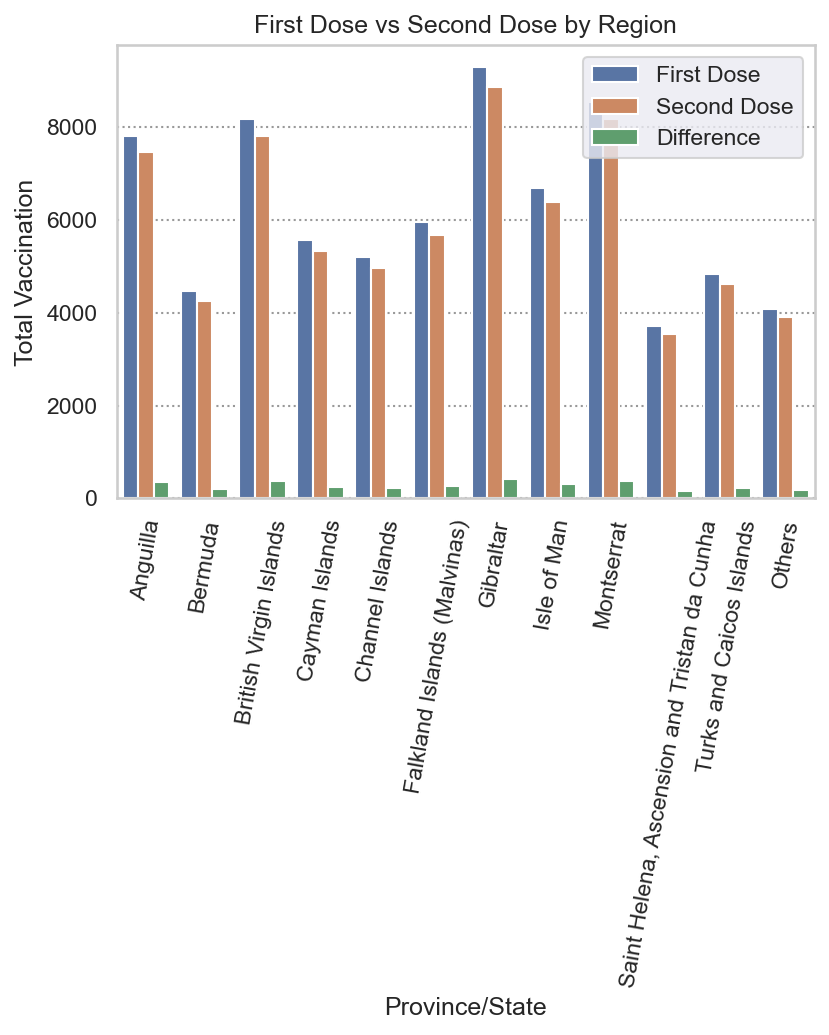

In [112]:
# change the DataFrame from wide to long

dose_results = pd.melt(covid_results,
                        id_vars=['Province/State', 
                                 'Country/Region',
                                 'Date'], 
                        value_vars=['First Dose', 
                                    'Second Dose',
                                    'Difference'])

# rename the columns for the new DataFrame
dose_results.rename(columns={'variable':'Type',
                             'value':'Count'}, 
                     inplace=True)

# set a new plot with size 12x6 and increase the DPI

sns.set_style("whitegrid",
                  {'grid.color':'.6','grid.linestyle':':'})
fig, ax = plt.subplots(dpi=150)
# increase size of lineplot
ax = sns.set(rc = {'figure.figsize':(12,6)})
           
# create a new barplot to show the numbers of first dose, second dose and the Difference.
ax = sns.barplot(x='Province/State', 
                 y='Count', 
                 hue='Type', 
                 data=dose_results, 
                 ci=None)

# update the plot with x ticks, updated title, a new y label and save the figure as a PNG
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.set_title('First Dose vs Second Dose by Region')
ax.legend(loc='best')
ax.set_ylabel('Total Vaccination')


In [113]:
# copy the covid results DataFrame to a new DF
death_results = covid_results.copy()


# group by the Date and aggregate the Deaths
death_data = death_results.groupby(['Date'])[['Deaths']].agg('sum')

print(death_data.head())
print(death_data.shape)



            Deaths
Date              
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
(632, 1)


Text(0.5, 1.0, 'Total Deaths over time for all regions')

Text(0, 0.5, 'Total Deaths')

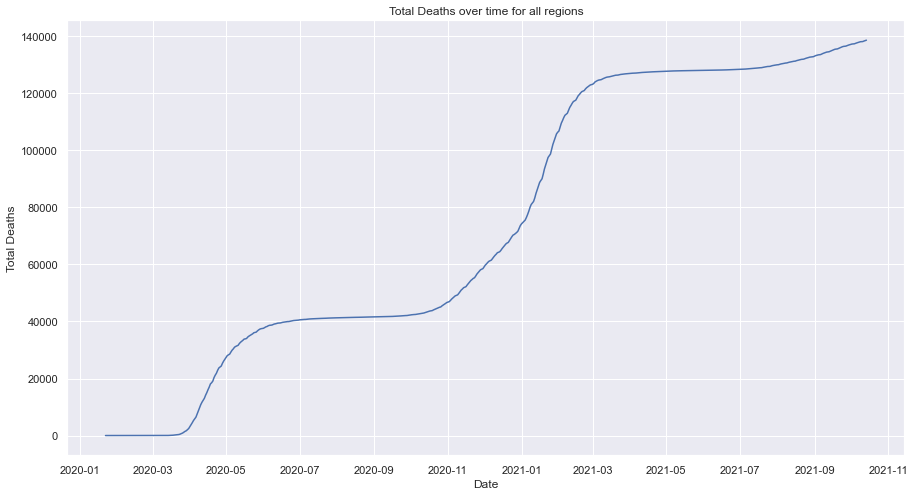

In [114]:
#increase size of lineplot
ax = sns.set(rc = {'figure.figsize':(15,8)})

#create lineplot for summary of all deaths across the time series
ax = sns.lineplot(x='Date', y='Deaths', data = death_data)
ax.set_title('Total Deaths over time for all regions')
ax.set_ylabel('Total Deaths')




In [115]:
# create a new DataFrame to hold the skewed data
skewed_data = covid_results.copy()

# validate the full list of records including 'Others' province
print(skewed_data.dtypes)

# create a filter to remove the skewed data province of Others identified in the last query
filter_1 = skewed_data['Province/State'] != 'Others'

# build the dataframe without the Other province
skewed_data.where(filter_1, inplace=True)

# perform the group by for province/state and Date whilst running sum aggregation on deaths
skewed_data_1 = skewed_data.groupby(['Province/State', 'Date'])[['Deaths']].agg('sum')

print(skewed_data_1.dtypes)

# validate the data showing reduced records having filtered out 632 rows for Others
print(skewed_data_1.head())
print(skewed_data_1.shape)

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
Difference                           int64
dtype: object
Deaths    float64
dtype: object
                           Deaths
Province/State Date              
Anguilla       2020-01-22     0.0
               2020-01-23     0.0
               2020-01-24     0.0
               2020-01-25     0.0
               2020-01-26     0.0
(6952, 1)


Text(0.5, 1.0, 'Total Deaths over time for all regions')

Text(0, 0.5, 'Total Deaths')

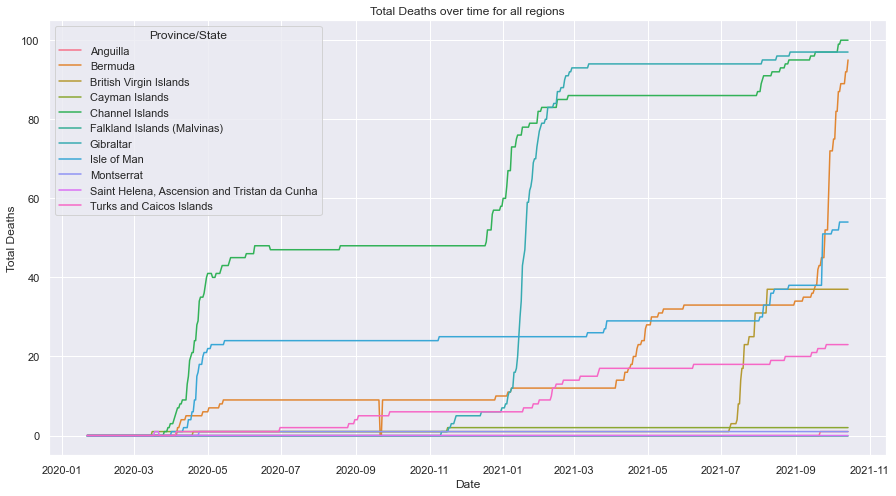

In [116]:
#increase size of lineplot
ay = sns.set(rc = {'figure.figsize':(15,8)})

#create lineplot for summary of all deaths across the time series
ay = sns.lineplot(x='Date', y='Deaths', hue='Province/State', data = skewed_data_1, ci=None)
ay.set_title('Total Deaths over time for all regions')
ay.set_ylabel('Total Deaths')


In [117]:
# add a month column to dataframe based on the Date
skewed_data['Month']= pd.to_datetime(skewed_data['Date']+pd.offsets.MonthBegin(0))

# filter out the Others Province
filter_1 = skewed_data['Province/State'] != 'Others'

# build the dataframe without the Other province
skewed_data.where(filter_1, inplace=True)

# perform the group by for province/state and Date whilst running sum aggregation on deaths
skewed_data_2 = skewed_data.groupby(['Province/State', 'Month'])[['Deaths']].agg('sum')

print(skewed_data_2.head())

                           Deaths
Province/State Month             
Anguilla       2020-02-01     0.0
               2020-03-01     0.0
               2020-04-01     0.0
               2020-05-01     0.0
               2020-06-01     0.0


Text(0.5, 1.0, 'Deaths by Month by Province')

Text(0, 0.5, 'Total Deaths')

[Text(18262.0, 0, 'Jan-20'),
 Text(18353.0, 0, 'Apr-20'),
 Text(18444.0, 0, 'Jul-20'),
 Text(18536.0, 0, 'Oct-20'),
 Text(18628.0, 0, 'Jan-21'),
 Text(18718.0, 0, 'Apr-21'),
 Text(18809.0, 0, 'Jul-21'),
 Text(18901.0, 0, 'Oct-21')]

Text(1590, 850, 'Gibraltar - 2966')

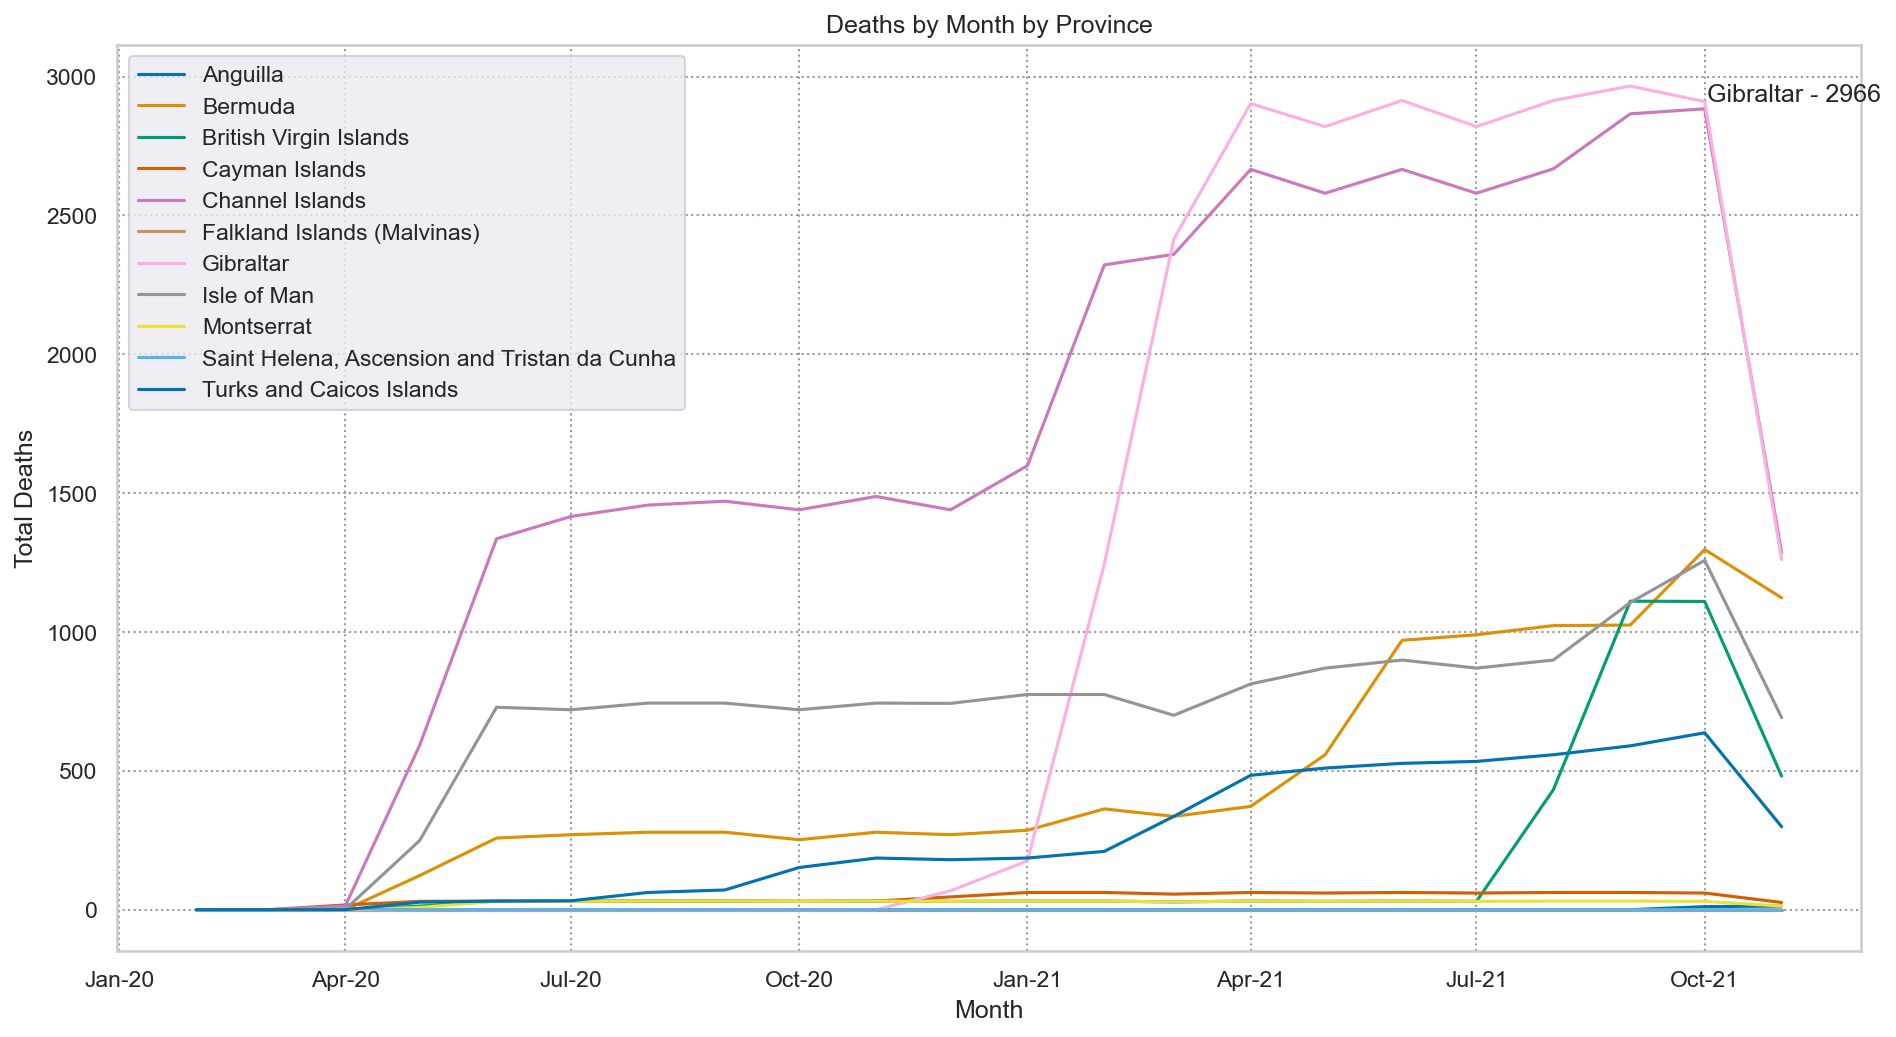

In [118]:
# set the style of the lineplot
sns.set_style("whitegrid",
                  {'grid.color':'.6','grid.linestyle':':'})
fig, ay = plt.subplots(dpi=150)
# increase size of lineplot
ay = sns.set(rc = {'figure.figsize':(15,8)})

# create lineplot for summary of all deaths for each Province across the time series
ay = sns.lineplot(x='Month', y='Deaths', hue='Province/State', data = skewed_data_2, ci=None, palette='colorblind')

# set the title
ay.set_title('Deaths by Month by Province')

# set the y axes label
ay.set_ylabel('Total Deaths')

# set the x ticks
ay.set_xticklabels(['Jan-20', 'Apr-20', 'Jul-20', 'Oct-20', 'Jan-21', 'Apr-21', 'Jul-21', 'Oct-21'])

# adjust the legend location
ay.legend(loc='best')

# add an annotation for the highest value number of deaths
ay.annotate('Gibraltar - 2966', xy=(1590,850), xycoords='axes pixels')

# save the figure as PNG
fig.savefig('Deaths_by_month.png')

In [137]:
# copy Covid Results DataFrame to new DataFrame
obj3 = covid_results.copy()

# add new Month column and convert the Date column to populate
obj3['Month']= pd.to_datetime(obj3['Date']+pd.offsets.MonthBegin(0))

# group by Province/State and Month whilst summing the Recovered values for each
recovered = obj3.groupby(['Province/State', 'Month'])[['Recovered']].agg('sum')

recovered.head()

Recovered
Province/State Month                
Anguilla       2020-02-01        0.0
               2020-03-01        0.0
               2020-04-01        0.0
               2020-05-01       29.0
               2020-06-01       93.0

Text(0.5, 1.0, 'Recoveries by Month by Province')

Text(0, 0.5, 'Total Recoveries')

[Text(18262.0, 0, 'Jan-20'),
 Text(18353.0, 0, 'Apr-20'),
 Text(18444.0, 0, 'Jul-20'),
 Text(18536.0, 0, 'Oct-20'),
 Text(18628.0, 0, 'Jan-21'),
 Text(18718.0, 0, 'Apr-21'),
 Text(18809.0, 0, 'Jul-21'),
 Text(18901.0, 0, 'Oct-21')]

Text(1450, 850, 'Ch. Islands - 148,288')

Text(1450, 775, 'Gibraltar - 133,975')

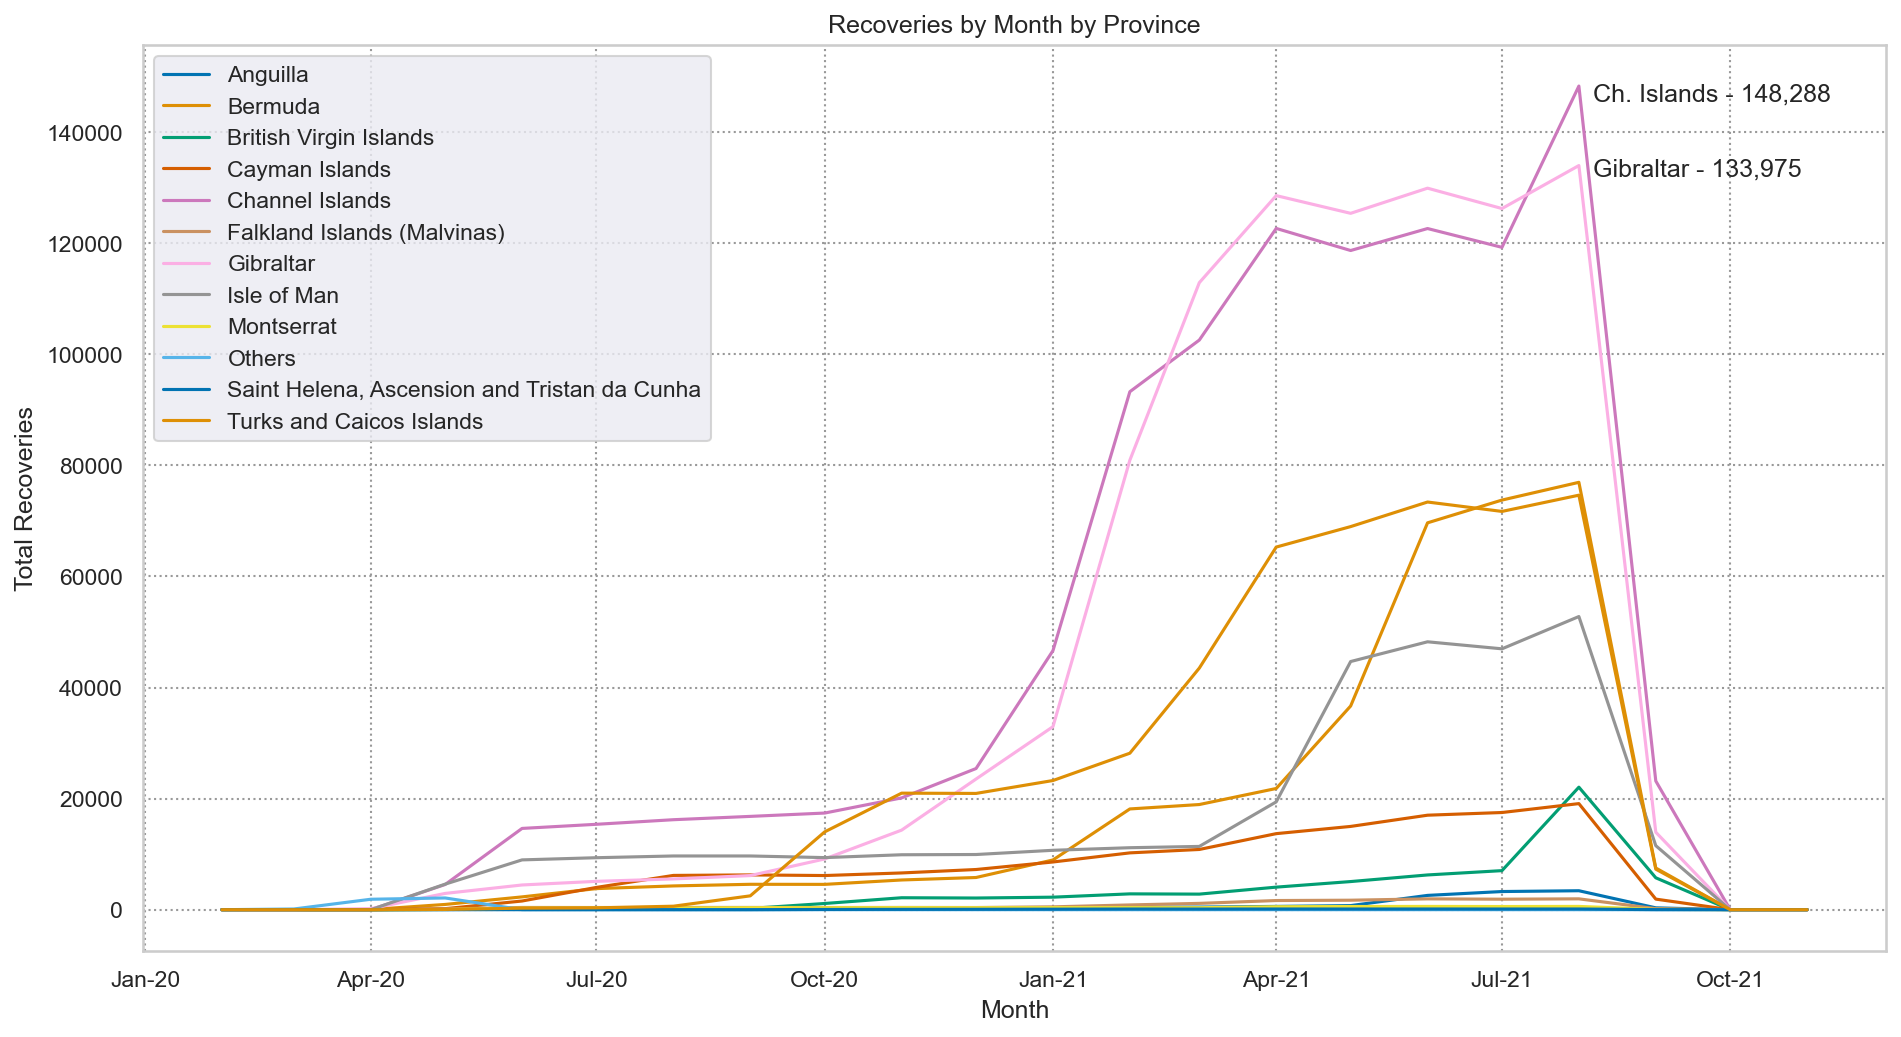

In [123]:
# set the lineplot style
sns.set_style("whitegrid",
                  {'grid.color':'.6','grid.linestyle':':'})

fig, az = plt.subplots(dpi=150)
az = sns.set(rc = {'figure.figsize':(15,8)})


#create lineplot for summary of all deaths for each Province across the time series
az = sns.lineplot(x='Month', y='Recovered', hue='Province/State', data = recovered, ci=None, palette='colorblind')

# set the chart title
az.set_title('Recoveries by Month by Province')

# set the y axes label
az.set_ylabel('Total Recoveries')

# set the x tick labels
az.set_xticklabels(['Jan-20', 'Apr-20', 'Jul-20', 'Oct-20', 'Jan-21', 'Apr-21', 'Jul-21', 'Oct-21'])

# set the legend to the best location
az.legend(loc='best')

# annotate the chart with the highest 2 recovery values
az.annotate('Ch. Islands - 148,288', xy=(1450,850), xycoords='axes pixels')
az.annotate('Gibraltar - 133,975', xy=(1450,775), xycoords='axes pixels')
fig.savefig('recoveries.png')


In [124]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# validate the tweets frame
tweets.info()

tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3960 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [125]:
# convert the text of the tweets to string datatype
tweets['text'] = tweets['text'].astype(str)

# using a lambda function, allocate the looped text only to a new DataFrame
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

tags = []

#create a list of values which contain a # and append it to the tags frame
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

# add the count of each # to the tags frame as a new Series
tags = pd.Series(tags).value_counts()

tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [126]:
# create a new DataFrame to store the output of tags

data = pd.DataFrame(tags).reset_index()

# label the columns
data.columns = ['hashtag', 'word count']

# change the count datatype to integer
data['word count'] = data['word count'].astype(int)

# print the dataframe with top 30 records
display(data.head(30))

,hashtag,word count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103
8,#coronavirus,100
9,#PeoplesVaccine.,84


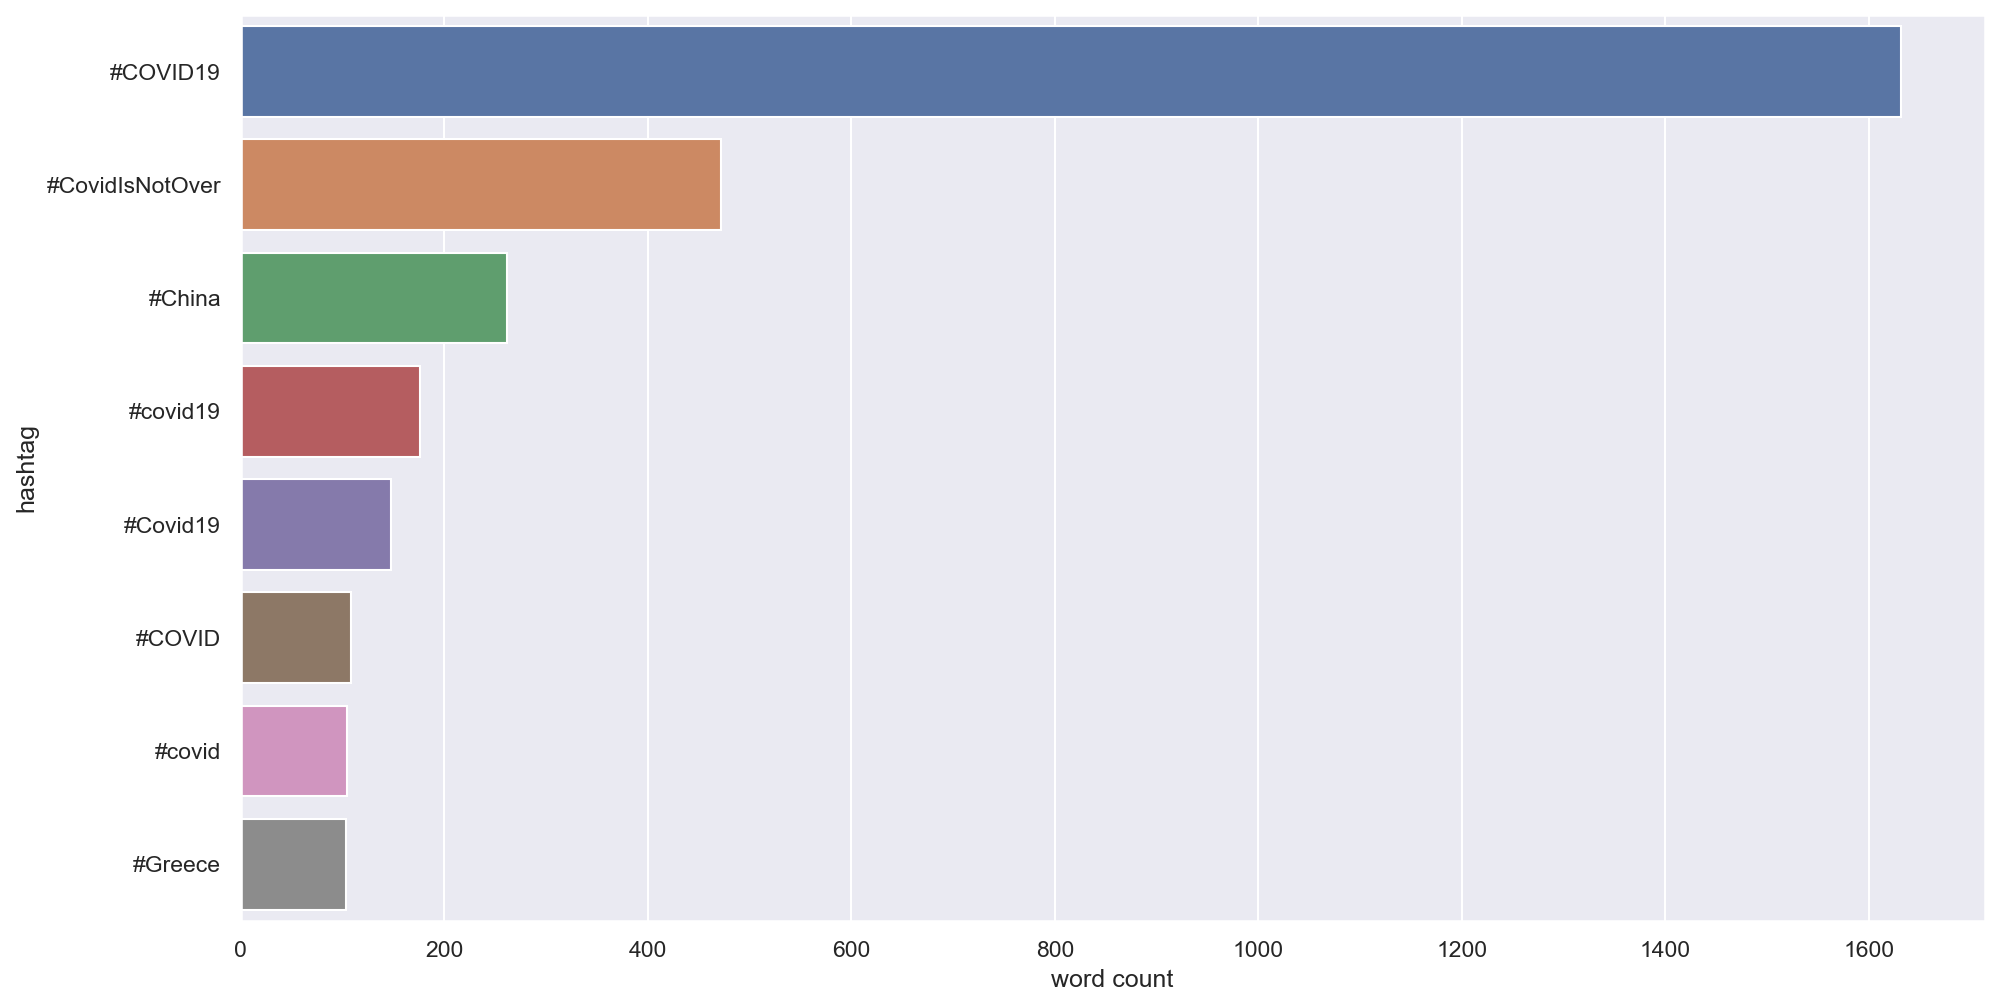

In [127]:
# change the plot DPI for clarity
fig, ax = plt.subplots(dpi=150)

# increase size of lineplot to allow for clear distinction of top # words
ax = sns.set(rc = {'figure.figsize':(20,8)}) 

# limit the plot to those words which appear more than 100m times
ax = sns.barplot(x='word count', y='hashtag', data = data.loc[(data['word count'] > 100)])

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

hospitalisation = pd.DataFrame()
hospitalisation['Province/State'] = uk_covid_cases['Province/State']
hospitalisation['Date'] = uk_covid_cases['Date']
hospitalisation['Hospitalised'] = uk_covid_cases['Hospitalised']

hospitalisation.set_index(hospitalisation['Date'])

ci_hospitalisation = hospitalisation[hospitalisation['Province/State']=='Channel Islands']

ci_hospitalisation.index = ci_hospitalisation['Date']

ci_hospitalisation.index = pd.to_datetime(ci_hospitalisation.index, format='%Y-%m-%d')

ci_hospitalisation.dtypes


Province/State     object
Date               object
Hospitalised      float64
dtype: object

0.0

2748.0

Hospitalised    778.25
dtype: float64

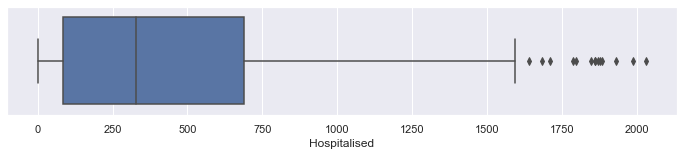

In [78]:
cols = ['Hospitalised']

ci_hospitalisation['Hospitalised'].min()
ci_hospitalisation['Hospitalised'].max()

Q1 = ci_hospitalisation[cols].quantile(0.25)
Q3 = ci_hospitalisation[cols].quantile(0.75)
IQR = Q3-Q1
IQR

condition = ~((ci_hospitalisation[cols] < (Q1 - 1.5 * IQR)) | (ci_hospitalisation[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

hospitalised_non_outlier = ci_hospitalisation[condition]

hospitalised_non_outlier['Date'] = pd.to_datetime(hospitalised_non_outlier['Date'])
hospitalised_non_outlier.index = pd.to_datetime(hospitalised_non_outlier.index, format='%Y-%m-%d')

#hospitalised_non_outlier.shape
#hospitalised_non_outlier.dtypes

fig = plt.subplots(figsize=(12,2))

ax = sns.boxplot(x=hospitalised_non_outlier['Hospitalised'], whis=1.5)

In [79]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# create a new function to determine the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

# copy the dataframe
s = hospitalised_non_outlier.copy()

# create a new variable for the rolling 7 window average
s_rolling = s['Hospitalised'].rolling(window=7).mean()

#add a new colun for the error and run the function against the hospitalised column
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])


s.sort_values('error', ascending=False).head(3)


,Province/State,Date,Hospitalised,error
Date,,,,
2020-03-27,Channel Islands,2020-03-27,509.0,436.285714
2020-03-28,Channel Islands,2020-03-28,579.0,423.571429
2020-03-29,Channel Islands,2020-03-29,667.0,416.285714


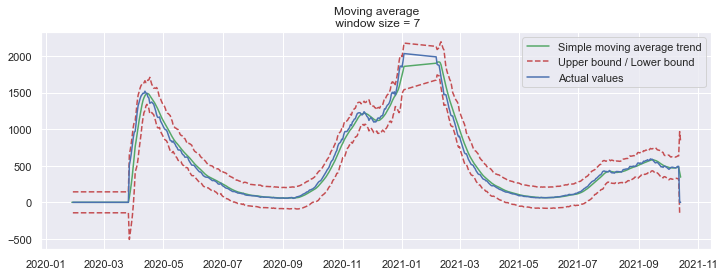

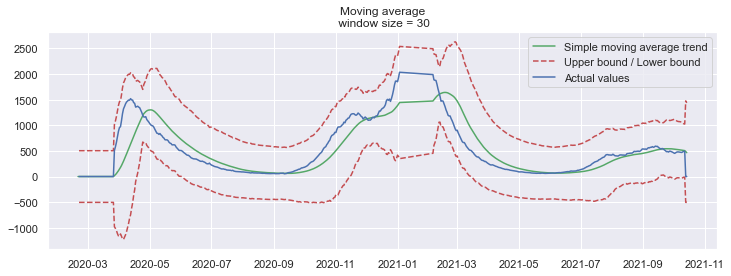

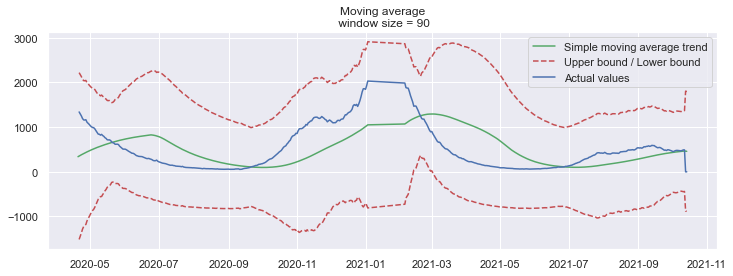

In [81]:
# plot the moving average of the hospitalised data for 5, 7 and 30 day intervals

plot_moving_average(hospitalised_non_outlier.Hospitalised, 7, plot_intervals=True)

plot_moving_average(hospitalised_non_outlier.Hospitalised, 30, plot_intervals=True)

plot_moving_average(hospitalised_non_outlier.Hospitalised, 90, plot_intervals=True)



Week 6 Questions:

What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Quantitative data refers to any information which can be quantified, measured or counted. Examples in our project include vaccination rates, calculated percentages and average forecasting.
Qualitative data is more descriptive and based on language e.g. Twitter posts. This type of data would allow us to analyse how governments are perceived to be handling the Covid pandemic and whether changes in approach would increase rates of those taking the vaccine.

Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

We should always be looking to continally improve our analysis to understand deeper causes of vaccination take up, reluctance to do so as well as areas of vaccine efficacy. The ability to continually improve can help the Provinces make the right choices on vaccination purchases, those areas which start to peak again as either vaccines wear off or a new strain of the virus is detected. We may also be in a position to identify and predict, based on historic quantitative data, when a new virus strain is likely to emerge and put mechanisms in place to mobilise more quickly than has been done to-date.

As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

The use and application of Data Ethics should underpin everything the Government does, thus ensuring that the public's perception and privacy expectations are exceeded. It is particularly important when medical records and identifiable information is collected at source. Whilst we are using aggregated data to perform this analysis, the initial data collection would still be under pervue of this project and under public scutiny. A good example as well in this project would be the scraping and use of Twitter data which is not aggregated and can theoretically identify the individual who posted it. If an Analyst came across a tweet which had been scraped that they did not agree with, they could theoretically use this in a malicious way.
